In [38]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFTGate  
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library.basis_change import QFT


In [39]:
def ladder_up(x):
    n = len(x)
    qc = QuantumCircuit(x, name="a†")

    for i in reversed(range(n)):
        controls = x[:i]
        if controls:
            qc.mcx(controls, x[i])
        else:
            qc.x(x[i])
    return qc.to_gate()

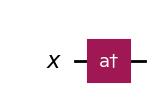

In [40]:
x = QuantumRegister(1, name='x')
ladder = ladder_up(x)
qc = QuantumCircuit(x)
qc.append(ladder, list(x))
qc.draw('mpl')